## Importando librerías

In [1]:
from keras.datasets import reuters
from keras import layers, models
import numpy as np

## Descarguemos datos

In [14]:
#dataset de noticias, traemos las 10000 palabras mas comunes
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)
print(train_labels.shape)

(8982,)


### Diccionario de palabras

In [18]:
#obtenemos el diccionario del significado de los numeros en palabras
word_index = reuters.get_word_index()
#invertimos la llave por el valor para que el numero sea la llave y el texto el valor
word_index = dict([(value,key) for (key,value) in word_index.items()])
print(len(word_index))

30979


In [5]:
for _ in train_data[0]:
    print(word_index.get( _ - 3))

None
None
None
said
as
a
result
of
its
december
acquisition
of
space
co
it
expects
earnings
per
share
in
1987
of
1
15
to
1
30
dlrs
per
share
up
from
70
cts
in
1986
the
company
said
pretax
net
should
rise
to
nine
to
10
mln
dlrs
from
six
mln
dlrs
in
1986
and
rental
operation
revenues
to
19
to
22
mln
dlrs
from
12
5
mln
dlrs
it
said
cash
flow
per
share
this
year
should
be
2
50
to
three
dlrs
reuter
3


### Función de vectorizar 

In [7]:
#convierte los textos a numeros para poder trabajar con machine learning
def vectorizar(sequences, dim=10000):
    restults = np.zeros((len(sequences),dim))
    for i, sequences in enumerate(sequences):
        restults[i,sequences]=1
    return restults     

## Transformando los datos

In [8]:
#ejecutamos la traslacion de texto a numero
x_train = vectorizar(train_data)
x_test = vectorizar(test_data)

In [9]:
from keras.utils.np_utils import to_categorical

In [11]:
#nuestro problema es de categorias por eso convertimos en categorias las salidas
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)


In [20]:
train_labels[0]

3

In [21]:
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

### Creando la red

In [56]:
from tensorflow.keras import regularizers
model = models.Sequential()
model.add(layers.Dense(65, activation='relu', input_shape=(10000,), kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.75))
model.add(layers.Dense(65, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(layers.Dropout(0.25))
model.add(layers.Dense(46, activation='softmax'))

In [57]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['acc']   
             )

In [58]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = y_train[:1000]
partial_y_train =  y_train[1000:]

### Entrenando el modelo

In [59]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=25,
                   batch_size=512,
                   validation_data=(x_val,y_val))

Epoch 1/25
16/16 [==============================] - 1s 36ms/step - loss: 4.3362 - acc: 0.2305 - val_loss: 3.2264 - val_acc: 0.5270
Epoch 2/25
16/16 [==============================] - 0s 20ms/step - loss: 3.0405 - acc: 0.4659 - val_loss: 2.4586 - val_acc: 0.5880
Epoch 3/25
16/16 [==============================] - 0s 19ms/step - loss: 2.5622 - acc: 0.5263 - val_loss: 2.1927 - val_acc: 0.6110
Epoch 4/25
16/16 [==============================] - 0s 21ms/step - loss: 2.3423 - acc: 0.5609 - val_loss: 2.0551 - val_acc: 0.6390
Epoch 5/25
16/16 [==============================] - 0s 20ms/step - loss: 2.1975 - acc: 0.5882 - val_loss: 1.9449 - val_acc: 0.6680
Epoch 6/25
16/16 [==============================] - 0s 20ms/step - loss: 2.0873 - acc: 0.6128 - val_loss: 1.8672 - val_acc: 0.6860
Epoch 7/25
16/16 [==============================] - 0s 19ms/step - loss: 1.9909 - acc: 0.6269 - val_loss: 1.8039 - val_acc: 0.6910
Epoch 8/25
16/16 [==============================] - 0s 21ms/step - loss: 1.9352 - a

### Validamos resultados

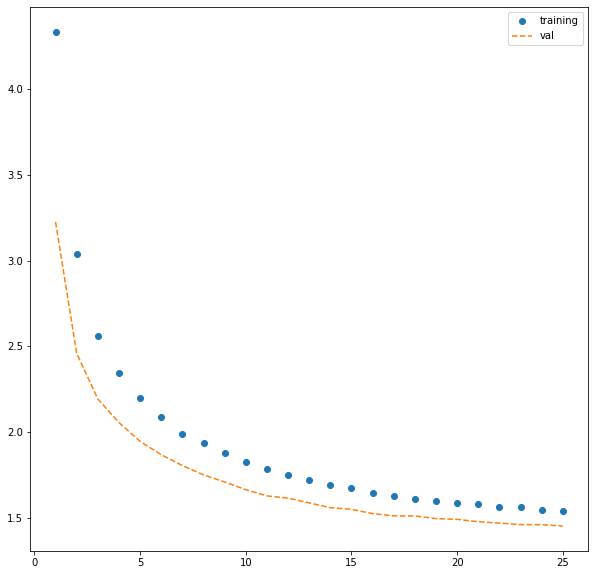

In [60]:
import matplotlib.pyplot as plt 

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='val')
plt.legend()
plt.show()


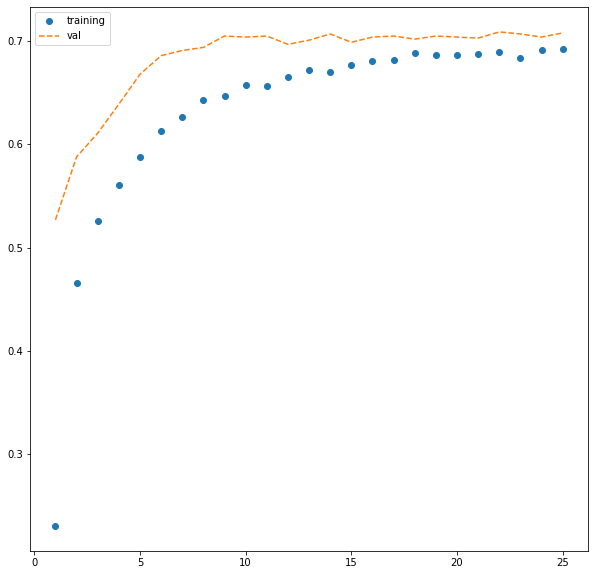

In [61]:
#precision de las predicciones
import matplotlib.pyplot as plt 

history_dict = history.history
loss_values = history_dict['acc']
val_loss_values = history_dict['val_acc']

fig = plt.figure(figsize=(10,10))
epoch = range(1,len(loss_values)+1)
plt.plot(epoch,loss_values, 'o',label='training')
plt.plot(epoch,val_loss_values, '--',label='val')
plt.legend()
plt.show()

In [53]:
# 1 definición del modelo
reg_dropout_model = models.Sequential()
reg_dropout_model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
reg_dropout_model.add(layers.Dropout(0.2))

reg_dropout_model.add(layers.Dense(64, activation='relu'))
reg_dropout_model.add(layers.Dropout(0.2))

reg_dropout_model.add(layers.Dense(64, activation='relu'))
reg_dropout_model.add(layers.Dropout(0.2))

reg_dropout_model.add(layers.Dense(46, activation='softmax'))


# 2 Compilación del modelo
reg_dropout_model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

# 3 Entrenamiento del modelo
history_reg_dropout_model = reg_dropout_model.fit(partial_x_train,
                                                  partial_y_train,
                                                  epochs=20,
                                                  batch_size=512,
                                                  validation_data=(x_val, y_val))
# 4 Validación
epoch = range(1,len(history_basic_model.history['val_loss'])+1)

plt.plot(epoch,history_reg_dropout_model.history['val_loss'], 'o',label='training')
plt.plot(epoch,history_reg_dropout_model.history['loss'], '--',label='validation')
plt.legend()
plt.title('Loss values - Dropout Model')
plt.show()
print('='*100)

plt.plot(epoch,history_reg_dropout_model.history['val_loss'], '*',label='Dropout Model')
plt.plot(epoch,history_regularizedL1_model.history['val_loss'], '+',label='Regularized L1 Model')
plt.plot(epoch,history_regularizedL2_model.history['val_loss'], 'o',label='Regularized L2 Model')
plt.plot(epoch,history_basic_model.history['val_loss'], '--',label='Basic Model')
plt.legend()
plt.title('Loss values')
plt.show()
print('='*100)

plt.plot(epoch,history_reg_dropout_model.history['val_acc'], '*',label='Dropout Model')
plt.plot(epoch,history_regularizedL1_model.history['val_acc'], '+',label='Regularized L1 Model')
plt.plot(epoch,history_regularizedL2_model.history['val_acc'], 'o',label='Regularized L2 Model')
plt.plot(epoch,history_basic_model.history['val_acc'], '--',label='Basic Model')
plt.legend()
plt.title('Accuracy values')
plt.show()

Epoch 1/20
16/16 [==============================] - 1s 32ms/step - loss: 0.4233 - acc: 0.0350 - val_loss: 0.1476 - val_acc: 0.0000e+00
Epoch 2/20
16/16 [==============================] - 0s 19ms/step - loss: 0.1370 - acc: 0.2065 - val_loss: 0.0789 - val_acc: 0.4520
Epoch 3/20
16/16 [==============================] - 0s 19ms/step - loss: 0.0886 - acc: 0.3864 - val_loss: 0.0603 - val_acc: 0.5350
Epoch 4/20
16/16 [==============================] - 0s 18ms/step - loss: 0.0694 - acc: 0.5021 - val_loss: 0.0505 - val_acc: 0.6070
Epoch 5/20
16/16 [==============================] - 0s 22ms/step - loss: 0.0577 - acc: 0.5806 - val_loss: 0.0454 - val_acc: 0.6430
Epoch 6/20
16/16 [==============================] - 0s 21ms/step - loss: 0.0504 - acc: 0.6309 - val_loss: 0.0421 - val_acc: 0.6830
Epoch 7/20
16/16 [==============================] - 0s 18ms/step - loss: 0.0449 - acc: 0.6735 - val_loss: 0.0391 - val_acc: 0.7090
Epoch 8/20
16/16 [==============================] - 0s 18ms/step - loss: 0.0404

NameError: ignored

In [45]:
model.evaluate(x_test, y_test)

71/71 [==============================] - 0s 4ms/step - loss: 1.1422 - acc: 0.7671


[1.1422346830368042, 0.767141580581665]

In [28]:
predictions = model.predict(x_test)

In [29]:
predictions[0]

array([6.63289848e-06, 1.39101094e-03, 3.79704989e-06, 8.76913607e-01,
       1.15783617e-01, 4.27657251e-05, 2.92178102e-05, 6.65702373e-06,
       2.94709462e-04, 2.67122209e-06, 7.23378835e-05, 1.24724800e-04,
       1.91074665e-04, 1.14295406e-04, 2.73949754e-05, 1.03387310e-05,
       5.91434713e-04, 4.73263754e-05, 3.10628348e-05, 6.57008437e-04,
       1.85756641e-03, 3.43765016e-04, 1.50091473e-05, 6.40857907e-05,
       4.11182737e-06, 2.35540356e-04, 3.18594175e-05, 2.53959879e-05,
       3.16175137e-05, 1.59044183e-04, 2.57653573e-05, 2.76511157e-04,
       1.71247593e-05, 3.18080606e-06, 8.95192061e-05, 1.59162232e-06,
       1.47974861e-04, 2.33364281e-05, 5.98752558e-06, 6.62260500e-05,
       1.79271956e-05, 1.16630572e-05, 4.89091371e-06, 1.47663159e-04,
       4.62479420e-06, 4.63011456e-05], dtype=float32)

In [30]:
np.sum(predictions[0])

1.0

In [31]:
np.argmax([2,5,65,3,6,7])

2

In [32]:
np.argmax(predictions[0])

3